In [16]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

## Минипроект

Опираясь на [карту](https://eusipa.org/wp-content/uploads/European_map_20160530_2016.pdf) Европейской ассоциации структурных инвестиционных
продуктов (EUSIPA) и ее [российскую адаптацию](https://naufor.ru/tree.asp?n=22890)

привести 2-3 ссылки на

*   структурные продукты, представленные на россиском рынке,
*   доступные наборы данных (напрмер, [HKEX](https://www.hkex.com.hk/Products/Securities/Structured-Products/Trading-Information-and-Historical-Data?sc_lang=en)).

In [17]:
## ваши ссылки

https://cbonds.ru/bonds/?status_id=5-1z141z4&kind_id=0-2&structured_note=1&order=document&dir=asc

# Cтруктурный продукт с полной защитой капитала

## СП с использованием бинарных опционов

Пример. Имеется 0,1 млн рублей, которые клиент готов инвестировать на 1 год. Ожидается, что текущая цена акции, равная 100 руб., не изменится более чем на 10%. Волатильность акции – 30%, депозитная процентная ставка и безрисковая процентная
ставка – 7%.

Постройте структурный продукт с полной защитой капитала и использованием опционной стратегии бинарный диапазон (binary range).

In [18]:
# оценка стоимости бинарного опциона колл
def binary_option_call(t, S, K, T, r, q, sigma):

    d1 = (np.log(S/K) + (r+sigma**2/2)*(T))/(sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)

    if t == 'cash-or-nothing':
      return np.exp(-r*T)*norm.cdf(d2)
    if t == 'asset-or-nothing':
      return S*np.exp(-q*T)*norm.cdf(d1)

# оценка стоимости бинарного опциона пут
def binary_option_put(t, S, K, T, r, q, sigma):
    d1 = (np.log(S/K) + (r+sigma**2/2)*(T))/(sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)

    if t == 'cash-or-nothing':
      return np.exp(-r*T)*norm.cdf(-d2)
    if t == 'asset-or-nothing':
      return S*np.exp(-q*T)*norm.cdf(-d1)

In [19]:
S = 100
K = 100
T = 1
r = 0.07
q = 0
N = 100000
sigma = 0.3
n = 100

In [20]:
K=90
b90 = binary_option_call('cash-or-nothing', S, K, T, r, q, sigma)
K=110
b110 = binary_option_call('cash-or-nothing', S, K, T, r, q, sigma)
print('digital range = ', b90-b110)

digital range =  0.24307515482345715


In [21]:
risk_part = N - N*np.exp(-r*T)
Q = round(risk_part/(b90-b110))
print('количество опционных стратегий', Q)

количество опционных стратегий 27813


In [22]:
print('максимальная доходность, годовых = ', (N+Q)/(N*T)-1)
print('максимальная доходность, непрерывно = ', np.log((N+Q)/(N*T)))

максимальная доходность, годовых =  0.27813
максимальная доходность, непрерывно =  0.24539807222181784


In [23]:
def call(S, K, T, sigma, r, q):
    d1 = (np.log (S / K) + (r + sigma**2 / 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * np.exp(-q * T) * norm.cdf(d1) - K * np.exp (-r * T) * norm.cdf(d2)

Пример. Постройте график доходности структурного продукта в сравнении с доходностью базового актива и безрисковой ставки.

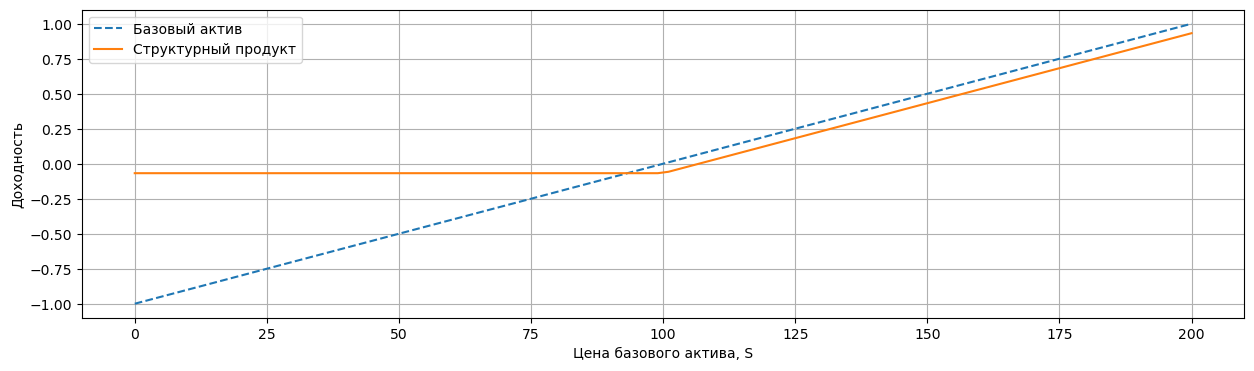

In [24]:
risk_part = N - N * np.exp(-r * T)
c = call(S, K, T, sigma, r, q)
PR = S * round(risk_part / c) / N

underlying_asset_profit = np.linspace(- S, S, n) / S
struct_product_profit = np.maximum(0, underlying_asset_profit) - round(risk_part / c) * c / N

x = np.linspace(0, 2 * S, n)
plt.figure(figsize=(15, 4))
#plt.title('Profit UA vs OC')
plt.plot(x, underlying_asset_profit, '--', label='Базовый актив')
plt.plot(x, struct_product_profit,  label='Структурный продукт')
plt.ylabel('Доходность')
plt.xlabel('Цена базового актива, S')
plt.grid()
plt.legend()
plt.show()

Пример. Постройте график зависимости коэффициента участия от встроенной комиссии, проварьируйте комиссию от 0 до 10% с шагом 1%.

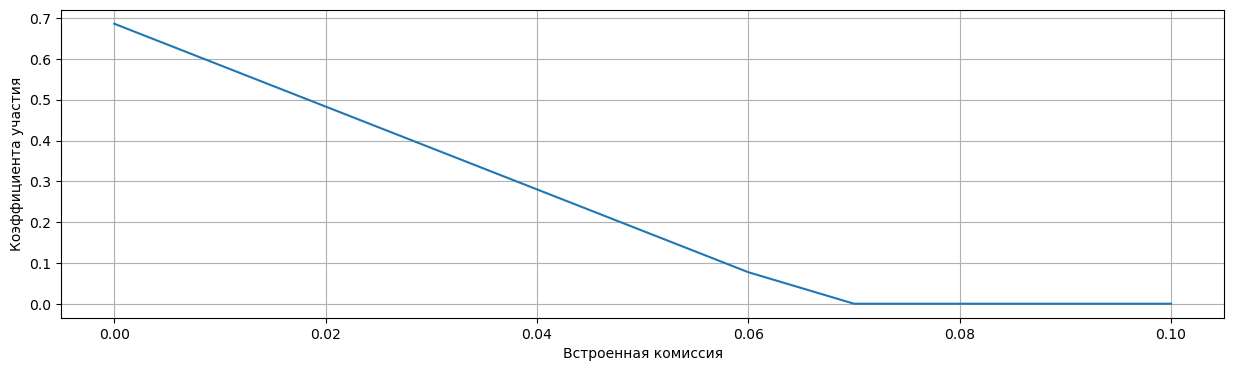

In [25]:
da = np.exp(-r * T) * N

Q = lambda fees: ( N * (1 - fees)  - da ) / c
fees = (np.linspace(0.0, 0.1, 11))
PR = K * Q(fees) / N

plt.figure(figsize=(15, 4))
#plt.title('PR from fees value')
plt.plot(fees, np.maximum(PR, 0))
plt.xlabel('Встроенная комиссия')
plt.ylabel('Коэффициента участия')
plt.grid()
plt.show()

Постройте график зависимости коэффициента участия от процентных ставок (депозитная и безрисковая ставки равны), проварьируйте ставки от 0 до 20% с шагом 1%.

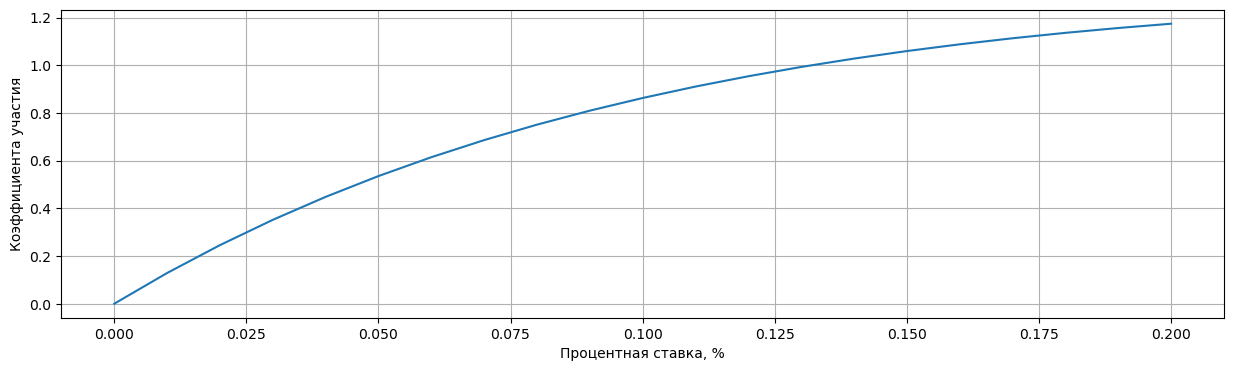

In [26]:
Q = lambda da, c: ( N * (1 - 0.0)  - da ) / c
rs = np.linspace(0, 0.2, 21)
cs = np.fromiter((call(S, K, T, sigma, ri, q) for ri in rs), dtype=np.float32)
das = np.exp(-rs * T) * N
Qs = np.fromiter((Q(da,c) for da,c in zip(das, cs)), dtype=np.float32)
PR = K * Qs / N

plt.figure(figsize=(15, 4))
#plt.title('PR from interest rate')
plt.plot(rs, np.maximum(PR, 0))
plt.xlabel('Процентная ставка, %')
plt.ylabel('Коэффициента участия')
plt.grid()
plt.show()

### Задача

Задача. Постройте трехмерных график зависимости коэффициента участия от депозитной и безрисковой ставок, проварьируйте ставки от 0 до 25% с шагом 1%.

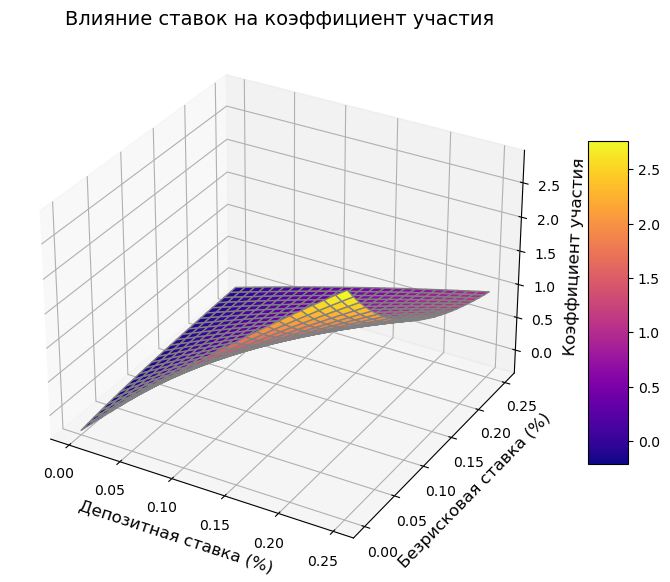

In [27]:
# ваш код
def participation_ratio(deposit_rate, option_price, notional, dividend_yield):
    return (notional * (1 - dividend_yield) - deposit_rate) / option_price

deposit_rates = np.arange(0, 0.26, 0.01)  # от 0 до 25% с шагом 1%
risk_free_rates = np.arange(0, 0.26, 0.01)

deposit_grid, risk_free_grid = np.meshgrid(deposit_rates, risk_free_rates)

notional_value = 100  # Примерное значение ноты
time_to_maturity = 1  # Срок до погашения (в годах)
volatility = 0.2  # Волатильность
strike_price = 100  # Цена исполнения опциона
spot_price = 100  # Текущая цена базового актива
dividend_yield = 0.02  # Дивиденды

# Функция для расчета цены опциона (например, европейский колл)
def option_price(spot, strike, maturity, vol, risk_free_rate, dividend_yield):
    from scipy.stats import norm
    d1 = (np.log(spot / strike) + (risk_free_rate - dividend_yield + 0.5 * vol**2) * maturity) / (vol * np.sqrt(maturity))
    d2 = d1 - vol * np.sqrt(maturity)
    return spot * np.exp(-dividend_yield * maturity) * norm.cdf(d1) - strike * np.exp(-risk_free_rate * maturity) * norm.cdf(d2)

# Расчет цен опционов для каждой пары ставок
option_prices = np.zeros_like(deposit_grid)
for i in range(len(deposit_rates)):
    for j in range(len(risk_free_rates)):
        option_prices[j, i] = option_price(
            spot_price, strike_price, time_to_maturity, volatility, risk_free_rates[j], dividend_yield
        )

# Расчет коэффициента участия
deposit_values = np.exp(-deposit_grid * time_to_maturity) * notional_value
participation_ratios = (notional_value * (1 - dividend_yield) - deposit_values) / option_prices

# Построение 3D-графика
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(projection="3d")

# Построение поверхности
surface = ax.plot_surface(
    deposit_grid,
    risk_free_grid,
    participation_ratios,
    cmap="plasma",  # Цветовая схема изменена
    edgecolor="gray",
)

# Подписи осей и заголовок
ax.set_title("Влияние ставок на коэффициент участия", fontsize=14)
ax.set_xlabel("Депозитная ставка (%)", fontsize=12)
ax.set_ylabel("Безрисковая ставка (%)", fontsize=12)
ax.set_zlabel("Коэффициент участия", fontsize=12)

# Добавление цветовой шкалы
fig.colorbar(surface, shrink=0.6, aspect=8)

plt.show()


Пример. Постройте график зависимости коэффициента участия от волатильности базового актива, проварьируйте волатильность от 0 до
100% с шагом 5%.

C:\Users\1\AppData\Local\Temp\ipykernel_9688\102214163.py:4: RuntimeWarning: divide by zero encountered in divide
  Q = lambda c: ( N * (1 - 0.0)  - da ) / c


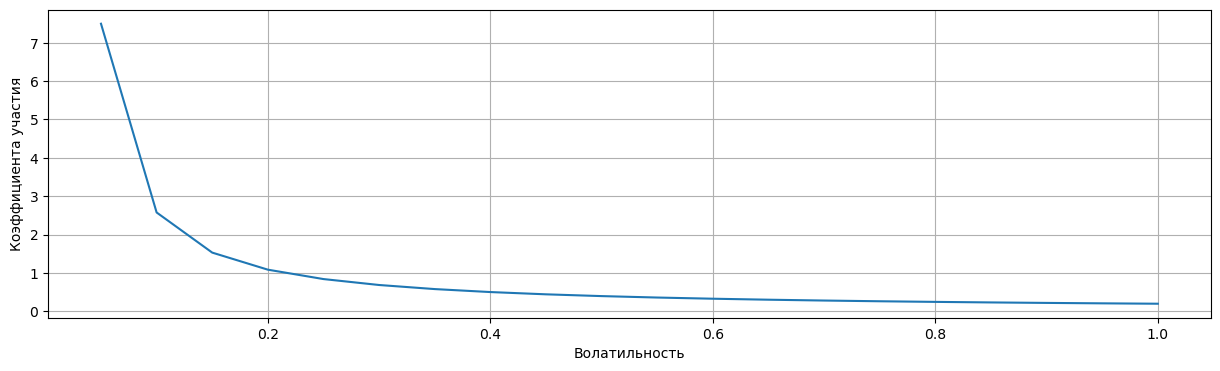

In [28]:
vs = np.linspace(1e-5, 1, 21)
cs = call(S, K, T, vs, r, q)
da = np.exp(-r * T) * N
Q = lambda c: ( N * (1 - 0.0)  - da ) / c
Qs = Q(cs)
PR = K * Qs / N

plt.figure(figsize=(15, 4))
#plt.title('PR from volatility')
plt.plot(vs, PR)
plt.xlabel('Волатильность')
plt.ylabel('Коэффициента участия')
plt.grid()
plt.show()

Пример. Постройте график влияния срока продукта (от 0 до 100 лет, с
шагом 6 месяцев) на соотношение безрискового и рискового вложений.

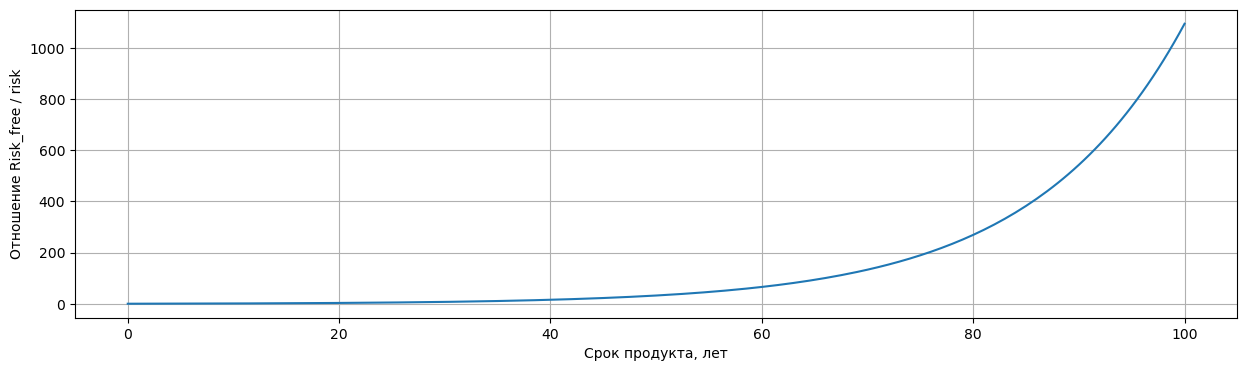

In [29]:
Ts = np.linspace(1e-5, 100, 201)
risk_parts = N - N * np.exp(-r * Ts)
ratios = risk_parts / (N - risk_parts)

plt.figure(figsize=(15, 4))
#plt.title('Risk-free to risk fraction relation on maturity date')
plt.plot(Ts, ratios)
plt.xlabel('Срок продукта, лет')
plt.ylabel('Отношение Risk_free / risk')
plt.grid()
plt.show()

Пример. Постройте график зависимости коэффициента участия от срока
продукта (от 0 до 20 лет, с шагом 6 месяцев).


C:\Users\1\AppData\Local\Temp\ipykernel_9688\4026867300.py:4: RuntimeWarning: divide by zero encountered in scalar divide
  Q = lambda c, d: ( N * (1 - 0.0)  - d ) / c


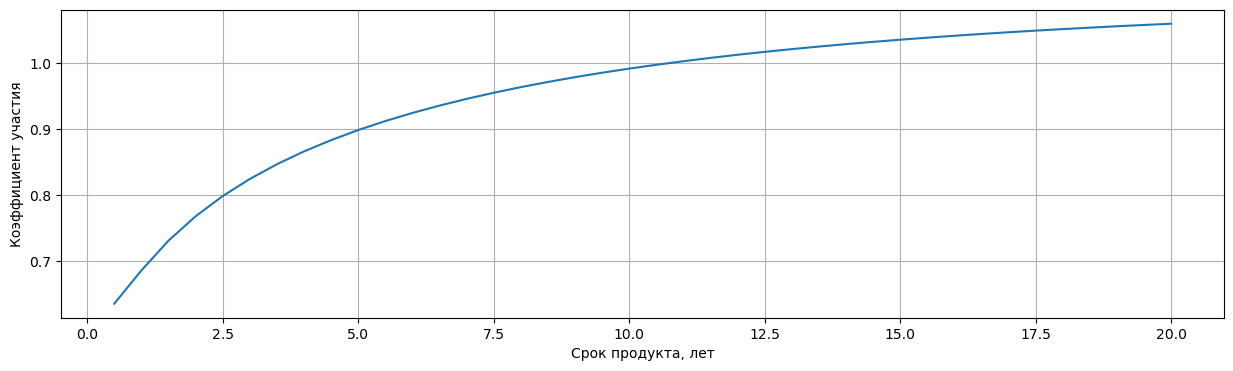

In [30]:
Ts = np.linspace(1e-5, 20, 41)
cs = call(S, K, Ts, sigma, r, q)
das = np.exp(-r * Ts) * N
Q = lambda c, d: ( N * (1 - 0.0)  - d ) / c
Qs = np.fromiter((Q(c, d) for c,d in zip(cs, das)), dtype=np.float64)
PR = K * Qs / N

plt.figure(figsize=(15, 4))
#plt.title('PR from maturity date')
plt.plot(Ts, PR)
plt.xlabel('Срок продукта, лет')
plt.ylabel('Коэффициент участия')
plt.grid()
plt.show()

Пример. Постройте график коэффициента участия от страйка продукта
(от 80 до 140, с шагом 10).

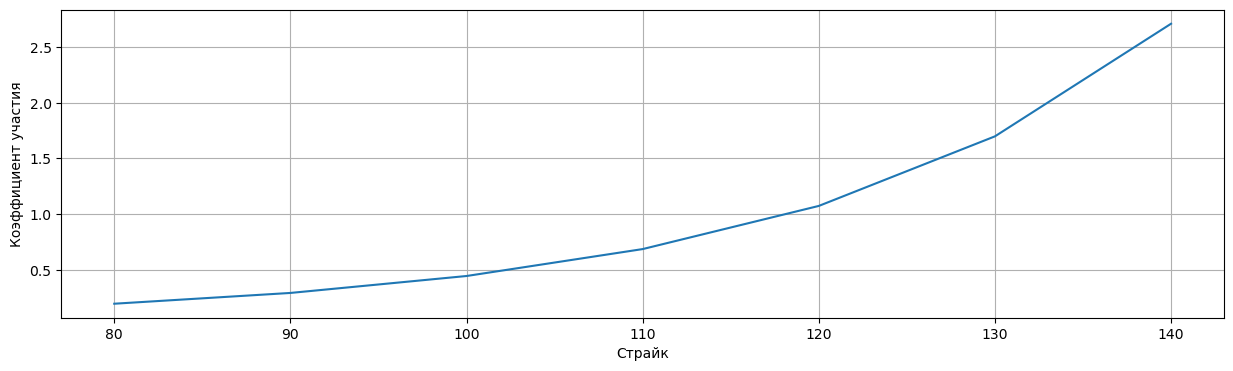

In [31]:
Ks = np.linspace(80, 140, 7)
cs = call(S, Ks, T,  sigma, r, q)
da = np.exp(-r * T) * N
Q = lambda c: ( N * (1 - 0.0)  - da ) / c
Qs = Q(cs)
PR = np.fromiter(((Kv * Qv / N) for Kv, Qv in zip(Ks, Qs)), dtype=np.float32)

plt.figure(figsize=(15, 4))
#plt.title('PR from strike')
plt.plot(Ks, PR)
plt.xlabel('Страйк')
plt.ylabel('Коэффициент участия')
plt.grid()
plt.show()

Пример. Постройте график доходности продуктов с разными страйками и
100% защитой капитала.

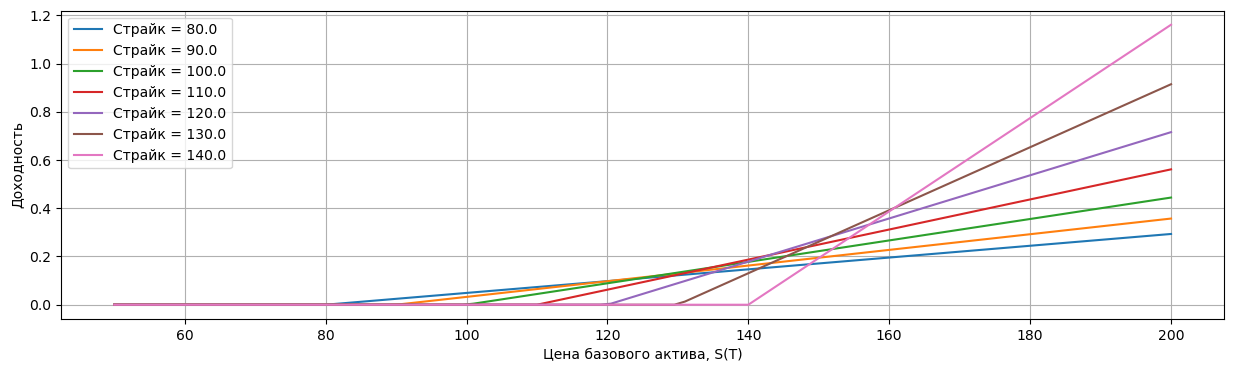

In [32]:
Ks = np.linspace(80, 140, 7)

cs = call(S, Ks, T, sigma, r, q)
da = np.exp(-r * T) * N
Q = lambda c: ( N * (1 - 0.0)  - da) / c
Qs = Q(cs)
# Qs = np.fromiter((Q(c) for c in zip(cs, das)), dtype=np.float64)
PR = np.fromiter(((Kv * Qv / N) for Kv, Qv in zip(Ks, Qs)), dtype=np.float32)
Sm = np.linspace(0.5*S, 2*S, 101)

plt.figure(figsize=(15, 4))
#plt.title('Profit on UA')
for i, pr in enumerate(PR):
    rs = np.maximum(0, pr * (Sm - Ks[i]) / Ks[i])
    plt.plot(Sm, rs, label=f'Страйк = {Ks[i]}')
plt.xlabel('Цена базового актива, S(T)')
plt.ylabel('Доходность')
plt.legend()
plt.grid()
plt.show()

Пример. Постройте графики доходностей продуктов с одним страйком и
разной степенью защиты капитала (от 80% до 150%, с шагом 10%)

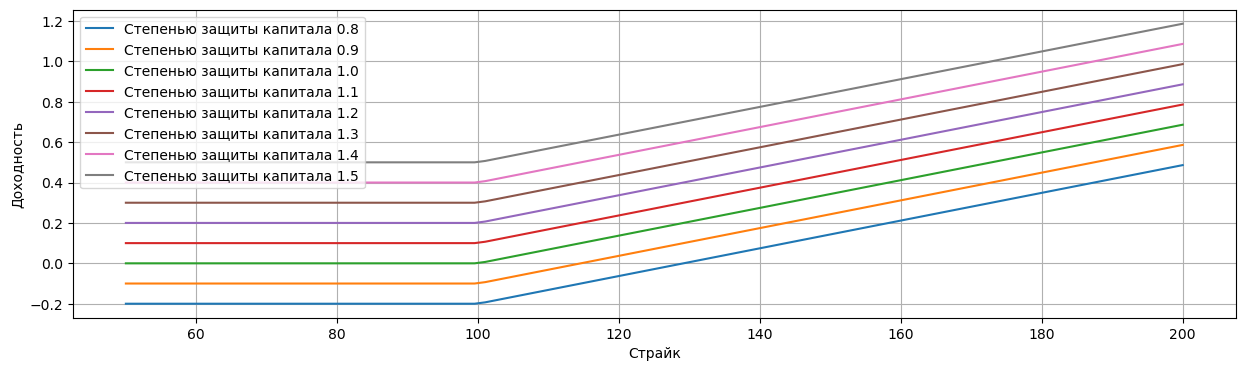

In [33]:
gs = np.linspace(0.8, 1.5, 8)
c = call(S, K, T, sigma, r, q)
da = np.exp(-r * T) * N
Q = lambda c: ( N * (1 - 0.0)  - da ) / c
PR = K * Q(c) / N
Sm = np.linspace(0.5*S, 2*S, 101)

plt.figure(figsize=(15, 4))
#plt.title('PR from strike')
for i, g in enumerate(gs):
    returns = np.maximum(g - 1, (g - 1) + PR * (Sm - S)/S)
    plt.plot(Sm, returns, label=f'Степенью защиты капитала {g}')
plt.xlabel('Страйк')
plt.ylabel('Доходность')
plt.legend()
plt.grid()
plt.show()

### Задача

Задача. В условиях примера постройте 3D график зависимости доходности структурного продукта от

*   страйков и
*   степени защиты капитала.

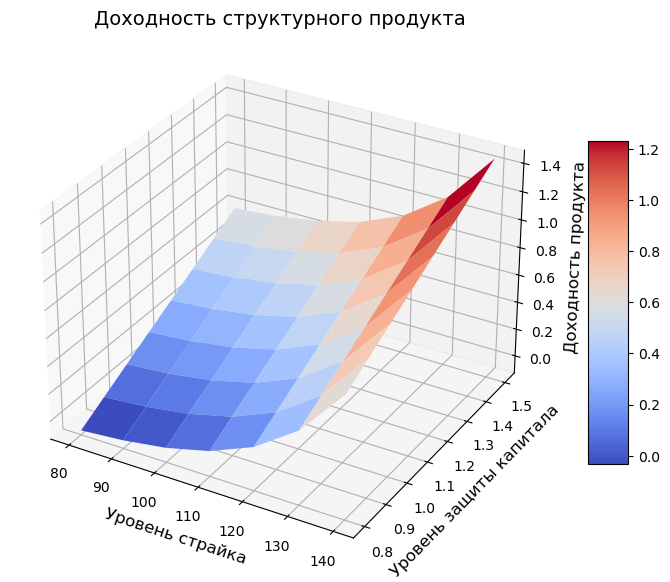

In [34]:
# ваш код
def european_call_price(spot, strike, maturity, vol, risk_free_rate, dividend_yield):
    from scipy.stats import norm
    d1 = (np.log(spot / strike) + (risk_free_rate - dividend_yield + 0.5 * vol**2) * maturity) / (vol * np.sqrt(maturity))
    d2 = d1 - vol * np.sqrt(maturity)
    return spot * np.exp(-dividend_yield * maturity) * norm.cdf(d1) - strike * np.exp(-risk_free_rate * maturity) * norm.cdf(d2)

# Параметры структурного продукта
strikes = np.linspace(80, 140, 7)  # Диапазон страйков
capital_protection = np.linspace(0.8, 1.5, 8)  # Диапазон степеней защиты капитала
S_values = np.linspace(50, 200, 101)  # Цена актива от 50 до 200

# Примерные параметры для расчета
spot_price = 100
volatility = 0.2
risk_free_rate = 0.05
dividend_yield = 0.02
time_to_maturity = 1
notional = 100  # Нота

# Создание сетки значений
strike_grid, protection_grid = np.meshgrid(strikes, capital_protection)

# Расчет цен колл-опционов
option_prices = np.array([european_call_price(spot_price, k, time_to_maturity, volatility, risk_free_rate, dividend_yield) for k in strikes])

# Дисконтированный актив
discounted_asset = notional * np.exp(-risk_free_rate * time_to_maturity)

# Расчет коэффициента участия
participation = (notional * (1 - 0) - discounted_asset) / option_prices

# Инициализация матрицы доходностей
returns_matrix = np.zeros_like(strike_grid)

# Расчет доходностей для каждой комбинации страйка и защиты капитала
for row, protection in enumerate(capital_protection):
    for col, strike in enumerate(strikes):
        protection_return = strike * participation[col] / notional
        individual_returns = np.maximum(protection - 1, (protection - 1) + protection_return * (S_values - strike) / strike)
        returns_matrix[row, col] = np.mean(individual_returns)

# Построение 3D графика
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(projection="3d")

# Построение поверхности
surface = ax.plot_surface(
    strike_grid,
    protection_grid,
    returns_matrix,
    cmap="coolwarm",  # Изменённая цветовая схема
    edgecolor="none"
)

# Подписи и оформление
ax.set_title("Доходность структурного продукта", fontsize=14)
ax.set_xlabel("Уровень страйка", fontsize=12)
ax.set_ylabel("Уровень защиты капитала", fontsize=12)
ax.set_zlabel("Доходность продукта", fontsize=12)

# Добавление цветовой шкалы
fig.colorbar(surface, shrink=0.6, aspect=8)

plt.show()

Пример. В условиях примера для опциона колл повторите все расчеты с использованием бинарной стратегии, основанной на покупке и продаже европейского опциона пут.

Ширину диапазона доходности базового актива задать самостоятельно. Выбор обосновать.

In [35]:
S = 100
K = 100
T = 1
r = 0.07
q = 0
N = 100000
sigma = 0.3

K1 = 100
bo1 = binary_option_put('cash-or-nothing', S, K1, T, r, q, sigma)
K2=110
bo2 = binary_option_put('cash-or-nothing', S, K2, T, r, q, sigma)
print('digital range = ', -bo1+bo2)

risk_part = N - N*np.exp(-r*T)
Q = round(risk_part/(-bo1+bo2))
print('количество опционных стратегий', Q)

print('максимальная доходность, годовых = ', (N+Q)/(N*T)-1)
print('максимальная доходность, непрерывно = ', np.log((N+Q)/(N*T)))

digital range =  0.11734811871736428
количество опционных стратегий 57612
максимальная доходность, годовых =  0.57612
максимальная доходность, непрерывно =  0.45496613066900204


Пример. Постройте график функции выплат для бинарных стратегий, основанных
*   на покупке и продаже опционов колл,
*  на покупке и продаже опционов пут.



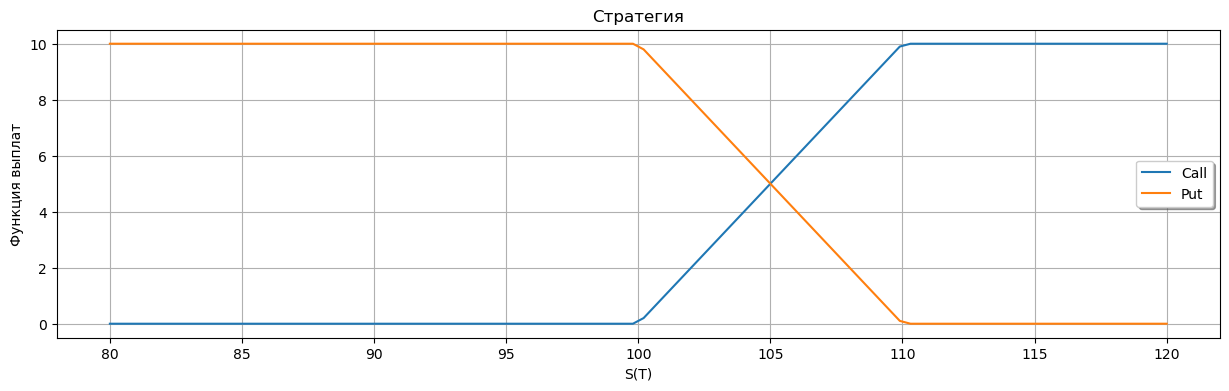

In [36]:
S = np.linspace(80, 120, 100)

C1 = np.maximum(S - K1, 0)
C2 = np.maximum(S - K2, 0)

P1 = np.maximum(-S + K1, 0)
P2 = np.maximum(-S + K2, 0)
plt.figure(figsize=(15,4))
plt.plot(S, C1 - C2, label=f'Call')
plt.plot(S, -P1 + P2, label=f'Put')
plt.legend(loc = 'best', fancybox = True, shadow = True)

plt.xlabel(f"S(T)")
plt.ylabel("Функция выплат")
plt.title("Стратегия")

plt.grid(True)
plt.show()

### Задача

Задача. Постройте графики трехмерных поверхностей для описания зависимости коэффициента участия при использовании бинарных опционов  
*   кол,
*   пут

от стоимости базового актива и количества дней до экспирации.

In [46]:
volatility = 0.3
strike_price = 100
nominal_value = 1

participation_rate = lambda cash_flow, option_price: (nominal_value * (1 - dividend_yield) - cash_flow) / option_price


time_to_expiry = np.linspace(0.1, 1, 300)
asset_prices = np.linspace(20, 200, 300)


price_grid, time_grid = np.meshgrid(asset_prices, time_to_expiry)


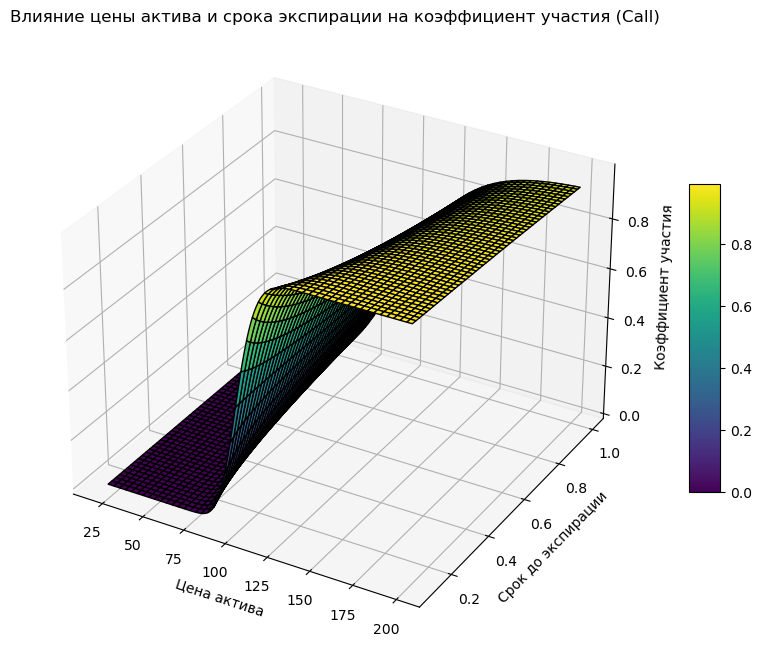

In [47]:
option_values = binary_option_call("cash-or-nothing", price_grid, strike_price, time_grid,risk_free_rate,dividend_yield,volatility)

cash_flows = np.exp(-risk_free_rate * time_grid) * nominal_value
participation_rates = np.where(
    option_values > 0,
    (nominal_value * (1 - dividend_yield) - cash_flows) / option_values,
    0,
)


fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection="3d")

surface = ax.plot_surface(
    price_grid, time_grid, option_values, cmap="viridis", edgecolor="k"
)

ax.set_title(
    "Влияние цены актива и срока экспирации на коэффициент участия (Call)"
)
ax.set_xlabel("Цена актива")
ax.set_ylabel("Срок до экспирации")
ax.set_zlabel("Коэффициент участия")

fig.colorbar(surface, shrink=0.5, aspect=10)
plt.show()

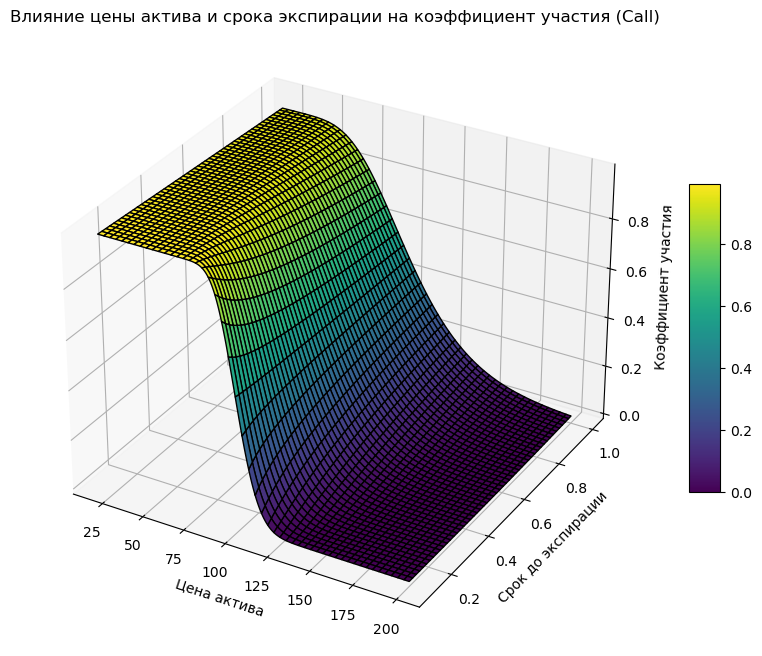

In [48]:
option_values = binary_option_put("cash-or-nothing", price_grid, strike_price, time_grid,risk_free_rate,dividend_yield,volatility)

cash_flows = np.exp(-risk_free_rate * time_grid) * nominal_value
participation_rates = np.where(
    option_values > 0,
    (nominal_value * (1 - dividend_yield) - cash_flows) / option_values,
    0,
)


fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection="3d")

surface = ax.plot_surface(
    price_grid, time_grid, option_values, cmap="viridis", edgecolor="k"
)

ax.set_title(
    "Влияние цены актива и срока экспирации на коэффициент участия (Call)"
)
ax.set_xlabel("Цена актива")
ax.set_ylabel("Срок до экспирации")
ax.set_zlabel("Коэффициент участия")

fig.colorbar(surface, shrink=0.5, aspect=10)
plt.show()

## CП с использованием гэп опционов

### Задача

Задача. Рассмотрим гэп опционы колл и пут на недивидендные акции со страйком 57 и сроком действия, истекающим 1 июля следующего года, на 1 января текущего года акции торгуются по цене 50.

Используя эти данные, вычислите цену опциона колл и пут, если безрисковая ставка равна 9%, цена страйк 50, волатильность 20%.

In [49]:
# ваш код
S = 50 
K1 = 57   
K2 = 50  
r = 0.09 
sigma = 0.2  
T = 0.5  # 6 месяцев
q = 0.0       

d1 = (np.log(S / K1) + (r - q + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
d2 = d1 - sigma * np.sqrt(T)

C = np.exp(-r * T) * (S * np.exp((r - q) * T) * norm.cdf(d1) - K2 * norm.cdf(d2))

P = np.exp(-r * T) * (K2 * norm.cdf(-d2) - S * np.exp((r - q) * T) * norm.cdf(-d1))

print(f'Цена кол: {C}')
print(f'Цена пут: {P}')

Цена кол: 2.89008843746616
Цена пут: 0.6899625291211517


В рамках модели Блэка-Шоулза решите следующие задачи для бинарных опционов.

Пример. Маркет-мейкер продает европейские гэп-колл опционы сумму 1000 сроком на один год и дельта-хеджирует позицию акциями.
Опцион гэп-колл выписан на одну акцию, не приносящую дивидендов. Текущая цена акции составляет 100.

Волатильность акции составляет 100\%. Каждый колл-гэп опцион  имеет цену исполнения 130, триггер цена равна  100. Безрисковая процентная ставка равна 0\%.

В рамках модели Блэка-Шоулза определите начальное количество акций для  дельта-хеджирования.

**Указание.** Определите дельту опциона и умножьте на 1000.

In [50]:
def first_derivative (f , x , args, h = 0.0001) :
    return (f(x + h, *args) - f(x - h, *args)) / (2 * h)

In [51]:
S = 100
K1 = 130 # strike
K2 = 100 # trigger
r = 0.0
sigma = 1
T = 1
q = 0


def calc_d1(S, K, T, r, q, sigma):
    return (np.log(S / K) + (r - q + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))

def calc_d2(S, K, T, r, q, sigma):
    return calc_d1(S, K, T, r, q, sigma) - sigma * np.sqrt(T)

def gap_option_price_call(S, K1, K2, T, r, q, sigma):
    d1 = calc_d1(S, K1, T, r, q, sigma)
    d2 = calc_d2(S, K1, T, r, q, sigma)
    price = S * np.exp(-q * T) * norm.cdf(d1) - K2 * np.exp(-r * T) * norm.cdf(d2)
    return price

def gap_option_price_put(S, K1, K2, T, r, q, sigma):
    d1 = calc_d1(S, K2, T, r, q, sigma)
    d2 = calc_d2(S, K2, T, r, q, sigma)
    price = K2 * np.exp(-r * T) * norm.cdf(-d2) - S * np.exp(-q * T) * norm.cdf(-d1)
    return price


def first_derivative(f, x, args, h=1e-3):
    return (f(x + h, *args) - f(x - h, *args)) / (2 * h)

c = gap_option_price_call(S, K1, K2, T, r, q, sigma)
delta = first_derivative(gap_option_price_call, S, (K1, K2, T, r, q, sigma))

print(f'Цена опциона: {c}')
print(f'Дельта: {delta * 1000}')

Цена опциона: 37.09968701695299
Дельта: 683.4186927022756


### Задача

Задача. В условиях примера определите начальное количество акций для дельта-хеджирования с использованием пут-гэп опционов. Выбор цены исполнения и триггер цены обосновать.

In [54]:
# ваш код
S = 100        
K1 = 130
K2 = 100       
r = 0.0        
sigma = 1
T = 1
q = 0


p = gap_option_price_put(S, K1, K2, T, r, q, sigma)
delta = first_derivative(gap_option_price_put, S, (K1, K2, T, r, q, sigma))
number_of_shares = delta * 1000  

print(f"Цена пут-гэп опциона: {p}")
print(f"Дельта опциона: {delta}")
print(f"Начальное количество акций для дельта-хеджирования: {round(number_of_shares)}")

Цена пут-гэп опциона: 38.292492254802625
Дельта опциона: -0.3085375387357203
Начальное количество акций для дельта-хеджирования: -309


Пример. Безрисковая процентная ставка составляет 6%, волатильность бездивидендных акций составляет 32%. Четырехлетний опцион пут «деньги или ничего» на эту акцию с триггерной ценой 135 имеет премию 0,32494. Найдите цену 4-летнего опциона колл «актив или ничего» на эту акцию с триггерной ценой 135.

In [ ]:
r = 0.06
sigma = 0.32
T = 4
K = 135
q = 0
put = 0.32494
put_type = 'cash-or-nothing'

opt_func = lambda x: binary_option_put(put_type, x, K, T, r, q, sigma) - put
S = fsolve(opt_func, K)[0]

call_type = 'asset-or-nothing'
call = binary_option_call(call_type, S, K, T, r, q, sigma)
call

120.75083564309931

Пример. Волатильность базового актива 25%, волатильность годового опциона колл со страйком 50 на акции составляет 120,68%. Маркет-мейкер выписывает один опцион колл и дельта хеджирует свою позицию. Стоимость акции в хеджирующем портфеле равна 34,74. Найдите цену годового опциона «деньги или ничего» колл на акцию с триггерной ценой 50.

In [ ]:
r = 0.00
sigma_S = 0.25
sigma_call = 1.2068
K = 50
T = 1
K2 = 50
S_hedge = 34.74
q = 0
call_type = 'cash-or-nothing'
call = binary_option_call(call_type, S_hedge, K, T, r, q, sigma_S)
call

0.05687902614969493

### Задача

Задача. На акции по текущей цене 75 выплачивают дивиденды по ставке 2% (непрырывное начисление), волатильность акций 40%. Коэффициент Шарпа для акции равен 0. Шестимесячный опцион «актив или ничего» колл на акцию с триггером 80 стоит 36,65.

Рассчитайте вероятность того, что опцион колл «актив или ничего» будет исполнен.

В условиях примера проанализируйте зависимость вероятности исполнения опциона колл «актив или ничего» от коэффициента Шарпа.

Приведите иллюстративные графики.

In [60]:
t = 1/2
S0 = 75
sigma = 0.4
q = 0.02
Sharpe = -.0
r = 0.07
c = 36.65
K2 = 80

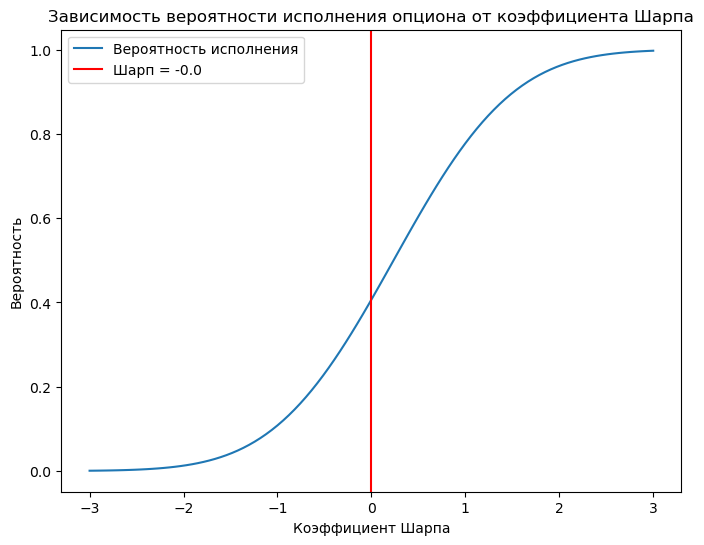

In [62]:
sharpe_ratios = np.linspace(-3, 3, 100)

probabilities = []
for sharpe in sharpe_ratios:

    probability = norm.cdf(calc_d2(S0, K2, T, r + sharpe * sigma, q, sigma))
    probabilities.append(probability)


plt.figure(figsize=(8, 6))
plt.plot(sharpe_ratios, probabilities, label="Вероятность исполнения")
plt.axvline(x=Sharpe, color='r', label=f"Шарп = {Sharpe}")
plt.title("Зависимость вероятности исполнения опциона от коэффициента Шарпа")
plt.xlabel("Коэффициент Шарпа")
plt.ylabel("Вероятность")
plt.legend()
plt.show()